# 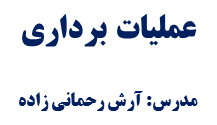

## Attributes & Indexing for Vector Data

<img src="https://editor.analyticsvidhya.com/uploads/51341GeoPandas.drawio.png">

In [ ]:
# !pip install geopandas

In [ ]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### Selection by Index Position

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.



### Subset Points by Location

In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the cx indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

.cx allows you to quickly access the table’s geometry, where indexing reflects [x,y] or [lon,lat].

## Proximity Analysis

In this chapter we are going to dig into some of the most common spatial operations. After this section you will be able to answer simple questions like “where is the nearest wendy’s?”, “Are there any homes within 50 yards of a highway?”.

### Buffer Analysis

In [ ]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from io import StringIO 

data = """
ID,X,Y
1,  -87.789,  41.976
1,  -87.482,  41.677
2,  -87.599,  41.908
2,  -87.598,  41.708
2,  -87.643,  41.675
"""
# use StringIO to read in text chunk
df = pd.read_table(StringIO(data), sep=',')

#zip the coordinates into a point object and convert to a GeoData Frame
points = [Point(xy) for xy in zip(df.X, df.Y)]
points = gpd.GeoDataFrame(df, geometry=points, crs = 'EPSG:4326')
# create line for each ID 
lines = points.groupby(['ID'])['geometry'].apply(lambda x:  LineString(x.tolist()))
lines = gpd.GeoDataFrame(lines, geometry='geometry', crs="EPSG:4326") 
lines.reset_index(inplace=True)

⚠ Important

NEVER do distance analysis with unprojeted data (e.g. lat lon). Distances are best not measured in degrees! Instead use .to_crs() to convert it to a projected coordinate system with a linear unit in feet or meters etc.

https://epsg.io/3857

There are a number of other parameters available to use, namely cap_style, and single_sided.

**cap_style**
<table class="colwidths-auto table" id="cap-style">
<thead>
<tr class="row-odd"><th class="head"><p>attribute</p></th>
<th class="head"><p>value</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>round</p></td>
<td><p>1</p></td>
</tr>
<tr class="row-odd"><td><p>flat</p></td>
<td><p>2</p></td>
</tr>
<tr class="row-even"><td><p>square</p></td>
<td><p>3</p></td>
</tr>
</tbody>
</table>

### Nearest Neighbor Analysis

One commonly used GIS task is to be able to find the nearest neighbor. For instance, you might have a single Point object representing your home location, and then another set of locations representing e.g. public transport stops. Then, quite typical question is “which of the stops is closest one to my home?” 

#### Nearest point using Shapely

In [ ]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

orig = Point(1, 1.67)
dest1, dest2, dest3 = Point(0, 1.45), Point(2, 2), Point(0, 2.5)

In [ ]:

print(nearest_geoms)
print('Coordinates of original point:',original_point)
print('Coordinates of closest destination point:',nearest_destination)

#### Nearest points using Geopandas

In [ ]:
from shapely.ops import nearest_points



In [ ]:
# generate origin and destination points as geodataframe
orig = {'name': ['Origin_1','Origin_2'], 
     'geometry': [Point(-77.3,38.94),Point(-77.41,39.93)]}
orig = gpd.GeoDataFrame(orig, crs="EPSG:4326")
print(orig)

dest = {'name': ['Baltimore','Washington', 'Fredrick'], 
     'geometry': [ Point(-76.61,39.29,), Point(-77.04,38.91), Point(-77.40,39.41)]}
dest = gpd.GeoDataFrame(dest, crs="EPSG:4326")
print(dest)

⚠ Note

If you want to do nearest neighbor analysis with polygons, you can simply use the centroid. If you have a geopandas polygon called poly, run poly[‘centroid’] = poly.centroid to store the centroid values in the attribute table.

## Extracting Spatial Data

In [ ]:
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

We will utilize shapefiles of San Francisco Bay Area county boundaries and wells within the Bay Area and the surrounding 50 km. We will first load in the data and reproject the data.

⚠ Important

All the data must have the same coordinate system in order for extraction to work correctly.

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1SjdYNa1Y5a_qNOY2Z9fsOEnkGcJEwKmK'
output = 'shapefiles.zip' 
gdown.download(url, output)

In [ ]:
!unzip shapefiles.zip

In [ ]:
# Load data

# County boundaries
# Source: https://opendata.mtc.ca.gov/datasets/san-francisco-bay-region-counties-clipped?geometry=-125.590%2C37.123%2C-119.152%2C38.640
counties = gpd.read_file("sf_bay_counties/sf_bay_counties.shp")

# Well locations
# Source: https://gis.data.ca.gov/datasets/3a3e681b894644a9a95f9815aeeeb57f_0?geometry=-123.143%2C36.405%2C-119.230%2C37.175
# Modified by author so that only the well locations within the counties and the surrounding 50 km were kept
wells = gpd.read_file("sf_bay_wells_50km/sf_bay_wells_50km.shp")

# Reproject data to NAD83(HARN) / California Zone 3
# https://spatialreference.org/ref/epsg/2768/
proj = 2768
counties = counties.to_crs(proj)
wells = wells.to_crs(proj)

We will also create a rectangle over a part of the Bay Area. We have identified coordinates to use for this rectangle, but you can also use bbox finder to generate custom bounding boxes and obtain their coordinates (click the + below to show code cell).

In [ ]:
# Create list of coordinate pairs
coordinates = [[1790787, 736108], [1929652, 736108], [1929652, 598414], [1790787, 598414]]

# Create a Shapely polygon from the coordinate-tuple list
poly_shapely = Polygon(coordinates)

# Create a dictionary with needed attributes and required geometry column
attributes_df = {'Attribute': ['name1'], 'geometry': poly_shapely}

# Convert shapely object to a GeoDataFrame
poly = gpd.GeoDataFrame(attributes_df, geometry = 'geometry', crs = "EPSG:2768")

We’ll define some functions to make displaying and mapping our results a bit easier (click the + below to show code cell).

In [ ]:
def display_table(table_name, attribute_table):
    '''Display the first and last five rows of attribute table.'''

    # Print title
    print("Attribute Table: {}".format(table_name))

    # Print number of rows and columns
    print("\nTable shape (rows, columns): {}".format(attribute_table.shape))

    # Display first two rows of attribute table
    print("\nFirst two rows:")
    display(attribute_table.head(2))

    # Display last two rows of attribute table
    print("\nLast two rows:")
    display(attribute_table.tail(2))


def plot_df(result_name, result_df, result_geom_type, area = None):
    '''Plot the result on a map and add the outlines of the original shapefiles.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot data depending on vector type
    # For points
    if result_geom_type == "point":

        # Plot data
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
        wells.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
        result_df.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

    # For polygons
    else:

        # Plot overlay data
        result_df.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

        # Plot outlines of original shapefiles
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')

    # Add additional outlined boundary if specified
    if area is not None:

        # Plot data
        area.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', linewidth = 3)

    # Else, pass
    else:
        pass

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title(result_name, fontdict = {'fontsize': '15', 'fontweight' : '3'})

### Clip Spatial Polygons

Clip extracts and keeps only the geometries of a vector feature that are within extent of another vector feature (think of it like a cookie-cutter or mask). We can use clip() in geopandas, with the first parameter being the vector that will be clipped and the second parameter being the vector that will define the extent of the clip. All attributes for the resulting clipped vector will be kept.

In [ ]:


# Display attribute table
display(clip_counties)

# Plot clip
plot_df(result_name = "San Francisco Bay Area Counties\nClip", result_df = clip_counties, result_geom_type = "polygon", area = poly)

In [ ]:


# Display attribute table
display(clip_wells)

# Plot clip
plot_df(result_name = "San Francisco Bay Area Wells\nClip", result_df = clip_wells, result_geom_type = "point", area = poly)

### Select Location by Attributes

In [ ]:
# Display attribute table
display(wells.head(2))

In [ ]:


# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells - Public Supply", attribute_table = wells_public)

In [ ]:


# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells - Public Supply with Depth Greater than 50 ft", attribute_table = wells_public_deep)

In [ ]:


# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells - Public Supply with Depth Greater than 50 ft or Residential", attribute_table = wells_public_deep_residential)

### Select by Location

Selecting by location selects features based on its relative spatial relationship with another dataset. In other words, features are selected based on their location relative to the location of another dataset.

For example:

to know how many wells there are in Santa Clara County, we could select all the wells that fall within Santa Clara County boundaries (which we do in one of the examples below)

to know what rivers flow through Santa Clara County, we could select all the river polylines that intersect with Santa Clara County boundaries

There are multiple spatial relationships available in geopandas:
<table class="colwidths-auto table" style="width:100%">
<thead>
<tr class="row-odd"><th class="text-align:left head" style="width:25%"><p>Spatial Relationship</p></th>
<th class="head" style="width:25%"><p>Function(s)</p></th>
<th class="text-align:right head" style="width:50%"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td class="text-align:left"><p>contains</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">contains()</span></code></p></td>
<td class="text-align:right"><p>geometry encompasses the other geometry’s boundary and interior without any boundaries touching</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>covers</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">covers()</span></code></p></td>
<td class="text-align:right"><p>all of the geometry’s points are to the exterior of the other geometry’s points</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p>covered by</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">covered_by()</span></code></p></td>
<td class="text-align:right"><p>all of the geometry’s points are to the interior of the other geometry’s points</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>crosses</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">crosses()</span></code></p></td>
<td class="text-align:right"><p>geometry’s interior intersects that of the other geometry, provided that the geometry does not contain the other </br>and the dimension of the intersection is less than the dimension of either geometry</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p>disjoint</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">disjoint()</span></code></p></td>
<td class="text-align:right"><p>geometry’s boundary and interior do not intersect the boundary and interior of the other geometry</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>equal geometry</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">geom_equals()</span></code>, <code class="docutils literal notranslate"><span class="pre"></br>geom_almost_equals()</span></code>, <code class="docutils literal notranslate"><span class="pre"></br>geom_equals_exact()</span></code></p></td>
<td class="text-align:right"><p>geometry’s boundary, interior, and exterior matches (within a range) those of the other</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p>intersects</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">intersects()</span></code></p></td>
<td class="text-align:right"><p>geometry’s boundary or interior touches or crosses any part of the other geometry</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>overlaps</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">overlaps()</span></code></p></td>
<td class="text-align:right"><p>geometry shares at least one point, but not all points, with the other geometry, provided that the geometries and </br>the intersection of their interiors all have the same dimensions</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p>touches</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">touches()</span></code></p></td>
<td class="text-align:right"><p>geometry shares at least one point with the other geometry, provided that no part of the geometry’s interior </br>intersects with the other geometry</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p>within</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">within()</span></code></p></td>
<td class="text-align:right"><p>geometry is enclosed in the other geometry (geometry’s boundary and interior intersects with </br>the other geometry’s interior only)</p></td>
</tr>
</tbody>
</table>

#### Method 1 - Shapely vector

In [ ]:


# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells within a User-Defined Rectangle", attribute_table = wells_within_rect_shapely)

# Plot selection
plot_df(result_name = "San Francisco Bay Area Wells within a User-Defined Rectangle", result_df = wells_within_rect_shapely, result_geom_type = "point", area = poly)

#### Method 2 - GeoDataFrame

In [ ]:


# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells within Santa Clara County", attribute_table = wells_within_sc_shapely)

# Plot selection
plot_df(result_name = "San Francisco Bay Area Wells within Santa Clara County", result_df = wells_within_sc_shapely, result_geom_type = "point", area = sc_county)

## Spatial Overlays and Joins

Combining two or more datasets together is a fundamental aspect of GIS. Using geopandas, we can create new geometries from existing datasets by overlaying them on top of each other, identifying where they do and do not overlap, and deciding what parts we want to extract from these overlays. For each of these new shapes, the attribute data from the existing constituent datasets are also combined together.

In this chapter, we will focus on vector overlays, which involve combining vector data. </br>
We’ll explore five types of vector overlays and merging: 
* union, 
* intersection, 
* difference (erase), 
* identity, and 
* spatial join.

In [ ]:
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
def plot_overlay(overlay_type, overlay_result):
    '''Plot the overlay result on a map and add the outlines of the original shapefiles on top.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot overlay data
    overlay_result.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

    # Plot outlines of original shapefiles
    counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
    watersheds.plot(ax = ax, color = 'none', edgecolor = 'dodgerblue')

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title('San Francisco Bay Area County and Watershed Boundaries\n{}'.format(overlay_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})


def plot_merge(merge_type, merge_result, merge_vector):
    '''Plot the merge result on a map.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot data depending on vector type
    # For points
    if merge_vector == "point":

        # Plot data
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
        merge_result.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

    # For polygons
    else:

        # Plot data
        merge_result.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title('San Francisco Bay Area County Boundaries and Well Locations\n{}'.format(merge_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})

To illustrate these geoprocessing tools, we will utilize shapefiles of San Francisco Bay Area county boundaries, Bay Area watershed boundaries, and wells within the Bay Area and the surrounding 50 km. We will load in the data and reproject the data

In [ ]:
watersheds = gpd.read_file("sf_bay_watersheds/sf_bay_watersheds.shp")
watersheds = watersheds.to_crs(proj)


### Overlays

For the first four, we can use the overlay function in geopandas. We simply change the argument for the how parameter to the overlay of our choosing.

We will use the county boundaries and watershed boundaries shapefiles in these examples. The overlays will allow us to see what areas are only in a county, only in a watershed, or in both.

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray', alpha = 0.75)
watersheds.plot(ax = ax, color = 'lightskyblue', edgecolor = 'dodgerblue', alpha = 0.55)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('San Francisco Bay Area County and Watershed Boundaries', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [ ]:
# Print attribute table
display(counties)

In [ ]:
# Print attribute table
display(watersheds)

#### Union

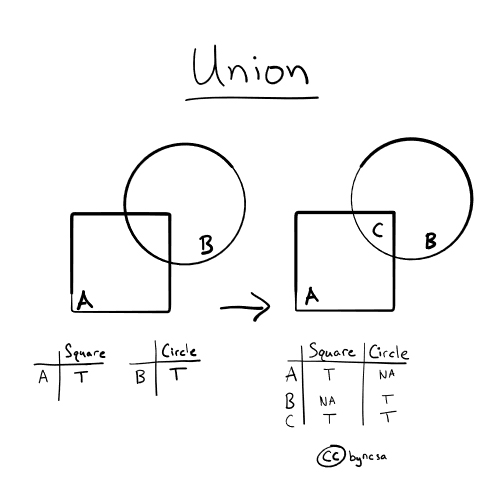

Looking at the attribute table, we see that the attributes from both individual datasets have been combined. The areas that are unique to one dataset (no overlap) have NaN as values in the fields that originated from the other dataset. 

In [ ]:


# Print head and tail of attribute table
display_table(table_name = "Union", attribute_table = union_result)

Next, we can map the data, filling in the areas with color that have been retained. As the plot shows, no data was removed.

In [ ]:
# Plot overlay
plot_overlay(overlay_type = "Union", overlay_result = union_result)

#### Intersection

With how='intersection', only the areas where all datasets contain data (have geometries) are combined together. 

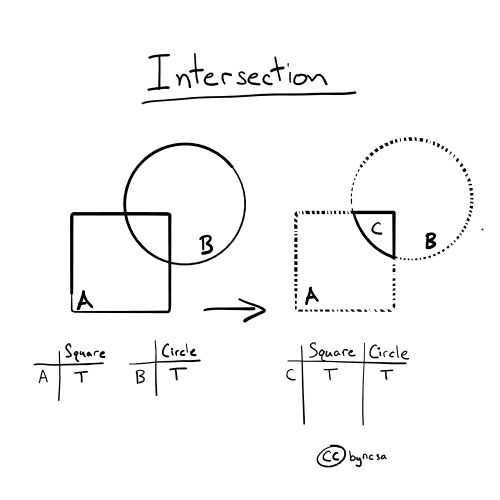

Because there are no areas unique to one dataset, notice how the attribute table of the combined dataset does not have any NaN values. When mapping the intersection overlay, we can see that any areas that did not have any overlay were discarded (areas with an outline but no fill). Areas covered by the county and watershed boundaries datasets are kept (shown in color).

In [ ]:

# Print head and tail of attribute table
display_table(table_name = "Intersection", attribute_table = intersection_result)

# Plot overlay
plot_overlay(overlay_type = "Intersection", overlay_result = intersection_result)

#### Identity

With how='identity', data from both layers are combined, but only the geometries that are unique to the first dataset or are covered by both datasets are kept. Any geometries unique to the second dataset (no overlapping with the first dataset) are discarded. 

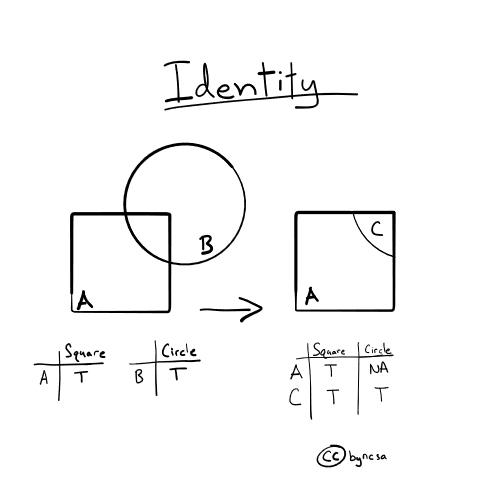

Looking at the attribute table, the fields from the individual datasets have been combined. For those geometries unique to the first dataset, the fields that came from the second dataset have NaN as values.

Looking at the map, we see all combined geometries except for the areas that are unique to the second dataset (watershed boundaries dataset).

In [ ]:


# Print head and tail of attribute table
display_table(table_name = "Identity", attribute_table = identity_result)

# Plot overlay
plot_overlay(overlay_type = "Identity", overlay_result = identity_result)

#### Difference (Erase)

With how='difference', the areas covered by the second dataset is used to “cut out” or erase those corresponding areas in the first dataset. In other words, only the areas in the first dataset that do not overlap with the second dataset are kept.

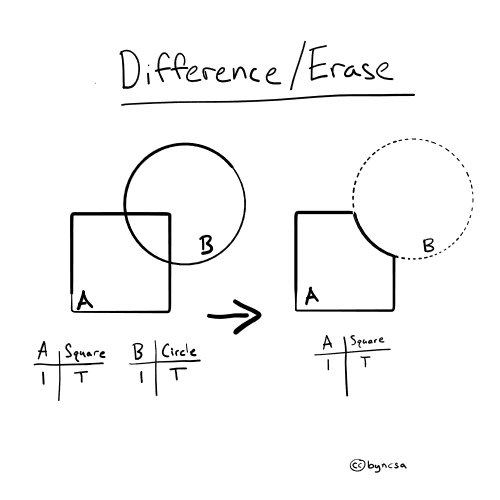

Looking at the attribute table, the fields from the second dataset do not appear in the combined dataset. The second dataset was “combined” with the first dataset by discarding some data (altering the geometry) from the first dataset.

Looking at the map, we only see areas of the first dataset (county dataset) that are not covered by the second dataset (watershed boundaries dataset).

In [ ]:


# Print head and tail of attribute table
display_table(table_name = "Difference", attribute_table = difference_result)

# Plot overlay
plot_overlay(overlay_type = "Difference", overlay_result = difference_result)

### Merge

#### Spatial Join

With spatial join, attributes from one dataset are appended to those in another dataset based on a specified relative spatial relationship. 3, 4

In geopandas, we use the sjoin() function. In addition to passing the datasets as arguments, and we also pass arguments for two parameters op and how. The op parameter specifies the spatial relationship needed in order for the attributes of one feature to be joined to another. 3

<p>Just like regular table joins, there are multiple types of spatial joins, which determine which features from both datasets are kept in the output dataset. This is specified using the <code class="docutils literal notranslate"><span class="pre">how</span></code> parameter. <a class="footnote-reference brackets" href="#gpd-merge" id="id15">3</a>, <a class="footnote-reference brackets" href="#esri-join" id="id16">4</a></p>


<table class="colwidths-auto table">
<thead>
<tr class="row-odd"><th class="text-align:left head"><p>Join Type</p></th>
<th class="text-align:right head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td class="text-align:left"><p><code class="docutils literal notranslate"><span class="pre">left</span></code></p></td>
<td class="text-align:right"><p>all features from the first or left dataset are kept, regardless if the feature met the specified spatial relationship criteria for a join/regardless if there is a match</p></td>
</tr>
<tr class="row-odd"><td class="text-align:left"><p><code class="docutils literal notranslate"><span class="pre">right</span></code></p></td>
<td class="text-align:right"><p>all features from the second or right dataset are kept, regardless if the feature met the specified spatial relationship  for a join</p></td>
</tr>
<tr class="row-even"><td class="text-align:left"><p><code class="docutils literal notranslate"><span class="pre">inner</span></code></p></td>
<td class="text-align:right"><p>only features from both datasets that met the spatial relationship and were joined are kept; the geometries from the first or left dataset are used for the join</p></td>
</tr>
</tbody>
</table>

We’ll illustrate this geoprocessing using the county boundaries shapefile and the well locations shapefile. Let’s quickly examine the wells attribute table and plot both datasets.

In [ ]:
# Print head and tail of attribute table
display_table(table_name = "San Francisco Bay Area and Surrounding Area Wells", attribute_table = wells)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('San Francisco Bay Area County Boundaries and Well Locations', fontdict = {'fontsize': '15', 'fontweight' : '3'})

#### Left Join

We’ll first demonstrate a left join. Notice that all features from the left dataset (wells dataset) are kept. The features that did not meet the spatial relationship criteria for a join have NaN as values for the fields that originated from the right dataset (county boundaries dataset).

In [ ]:
# Get inner join
left_join_result = gpd.sjoin(wells, counties, how = "left", op = 'within')

# Print head and tail of attribute table
display_table(table_name = "Left Join", attribute_table = left_join_result)

# Plot merge
plot_merge(merge_type = "Left Join", merge_result = left_join_result, merge_vector = "point")

#### Right Join

For a right join, all features from the right dataset (county boundaries dataset) are kept but are repeated multiple times. This is because a “new” county feature is created for every well point that falls within a county’s boundary. As a result, because wells must fall within the county boundaries for a join to occur on the county boundaries feature, there are no resulting features with NaN as values in the attribute table.

Attention

The results here are a bit useless, since it’s just each county boundary multiplied by the number of wells in that county, but we kept this example for comprehensiveness.

In [ ]:
# Get inner join
right_join_result = gpd.sjoin(wells, counties, how = "right", op = 'within')

# Print head and tail of attribute table
display_table(table_name = "Right Join", attribute_table = right_join_result)

# Plot merge
plot_merge(merge_type = "Right Join", merge_result = right_join_result, merge_vector = "polygon")

#### Inner Join

Finally, with an inner join, only the well locations that fall within the county boundaries are kept. These well locations have the county boundaries dataset appended to them. Because it’s an inner join, there are no resulting features with NaN as values in the attribute table.

In [ ]:
# Get inner join
inner_join_result = gpd.sjoin(wells, counties, how = "inner", op = 'within')

# Print head and tail of attribute table
display_table(table_name = "Inner Join", attribute_table = inner_join_result)

# Plot merge
plot_merge(merge_type = "Inner Join", merge_result = inner_join_result, merge_vector = "point")

## Spatial Joins

To spatially join one dataset to another, attributes from the first dataset (join feature) are appended to the attributes in the second dataset (target feature) based on the relative spatial relationship between the two datasets’ geometries.

Note

Unlike table joins by attributes, we’re not really concerned with the tables having a primary key (a column, or columns, that uniquely identifies each record in a table) to conduct a join. Instead, the relative spatial location between the features in two datasets will determine what gets joined.

### Spatial Join Relationships

There are multiple spatial join relationships that we can specify. Only the features that meet the specified spatial relationship criteria will be joined together. 1, 2 The spatial arrangement necessary to satisfy a specified spatial relationship depends on the vector types (i.e., point, line, polygon) of the join feature and the target feature. Note that some spatial relationships are not possible for certain combinations of vector types.

#### Contains

One feature contains another if the geometry’s points are not to the exterior of the other’s geometry and the geometry’s interior contains at least one point of the other geometry’s interior.

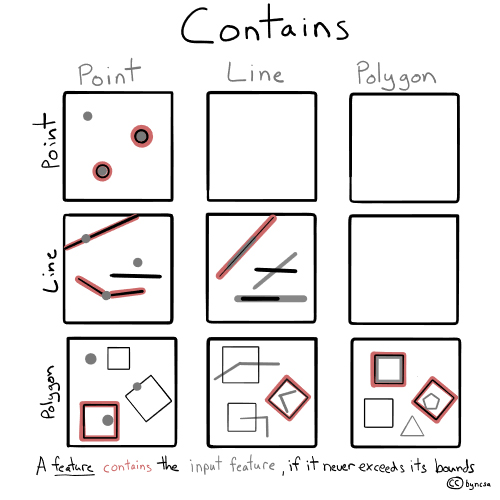

#### Crosses

The geometry’s interior crosses that of the other geometry, provided that the geometry does not contain the other and the dimension of the intersection is less than the dimension of either geometry.



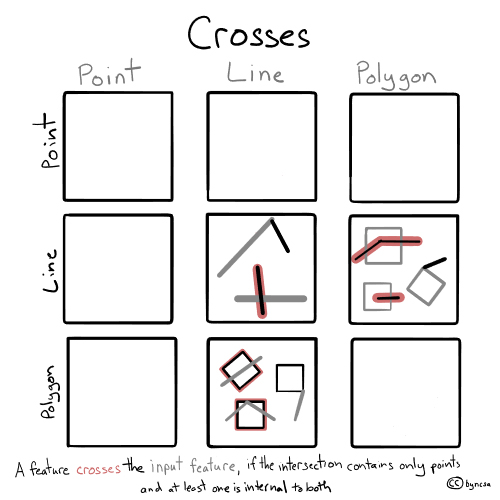

#### Intersects

A feature intersects another if the geometry’s boundary or interior has any part in common with the other geometry.



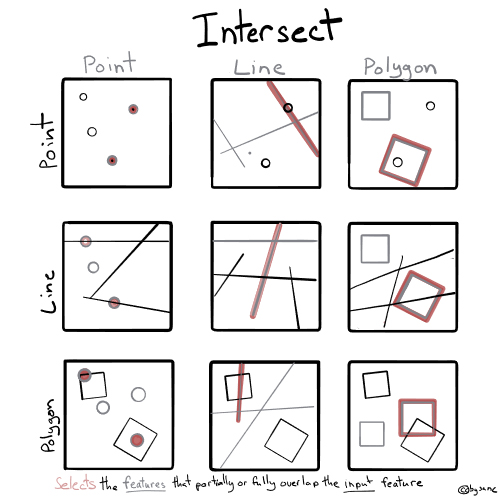

#### Overlaps

A feature overlaps another if the geometry shares at least one point, but not all points, with the other geometry, provided that the geometries and the intersection of their interiors all have the same dimensions.



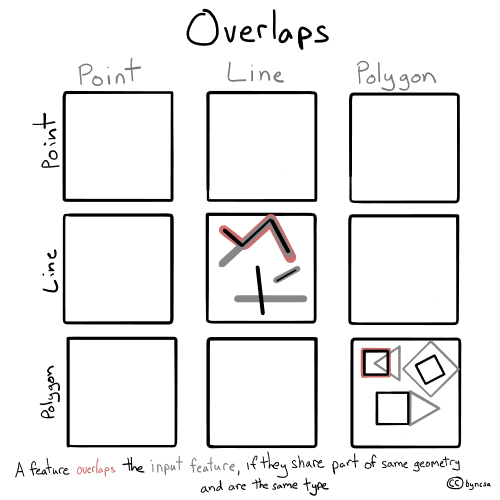

#### Touches

A feature touches another if the geometry shares at least one point with the other geometry, provided that no part of the geometry’s interior intersects with the other geometry.



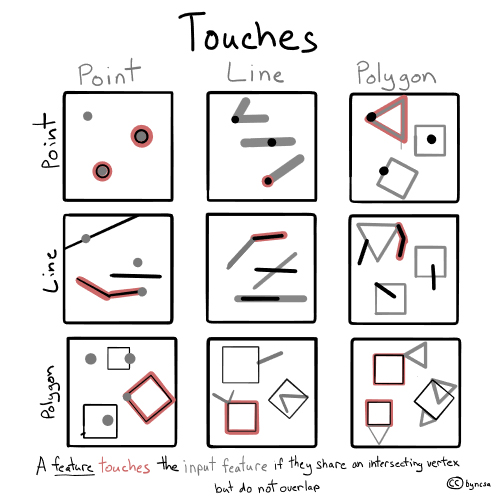

#### Within

A feature is within another if the geometry is enclosed in the other geometry (geometry’s boundary and interior intersects with the other geometry’s interior only).



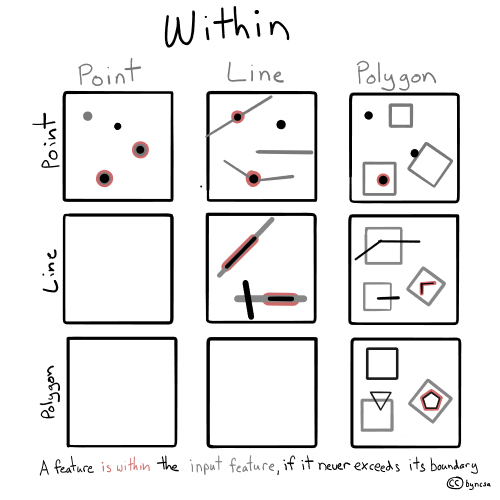

### Spatial Join Types

There are four types of spatial joins: outer join, inner join, left join, and right join. These spatial join types determine which features from both datasets are kept in the resulting output dataset.



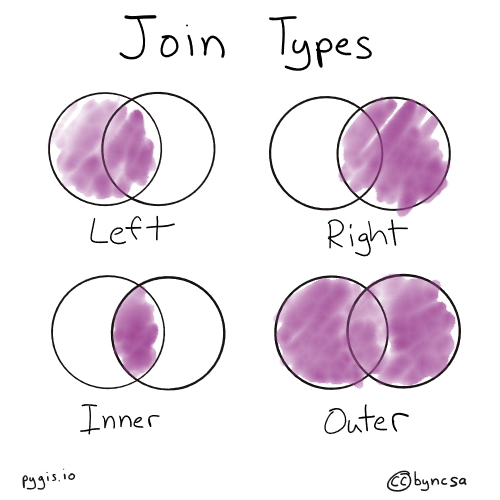

Only the inner, left, and right join types are available in the geopandas module and are identical to those in pandas. 2



### Table Relationships

Table relationships, or cardinality, specify the direction of the join and the relationship between the two datasets. There are four types of table relationships: one-to-one, one-to-many, many-to-one, and many-to-many. While these relationships are not specified as a parameter in the geopandas module when conducting a spatial join, it is important to have a general idea of the table relationship between the two datasets. Generally, a many-to-one join and a many-to-many join should be avoided because it can create ambiguity and unpredictability when analyzing and manipulating the resulting attribute table.

#### One-to-one relationship


Each feature in one geometry is linked to one (and only one) feature in the second geometry (and vice versa). Each feature in both datasets will appear only once at most. 3



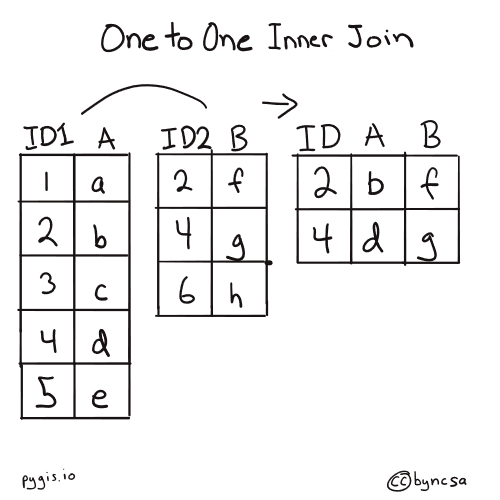

#### One-to-many relationship or many-to-one relationship

Each feature in one geometry is linked to one or more features in the second geometry. The output geometry may see the “one” feature duplicated across multiple rows to accommodate its multiple linkages in the other dataset (the “many”). A one-to-many or many-to-one relationship can be dependent on the spatial join type (for example, if a left join results in a one-to-many relationship, then a right join will result in a many-to-one relationship). 3



Warning

These two table relationships—while similar—are not the same! In a one-to-many relationship, the “many” geometry is the dataset that is being joined to. Alternatively, in a many-to-one relationship, the “one” geometry is the dataset being joined to. Thus, the many-to-one relationship can result in duplicate “one” geometries and create uncertainty, which is why a many-to-one join should be avoided.

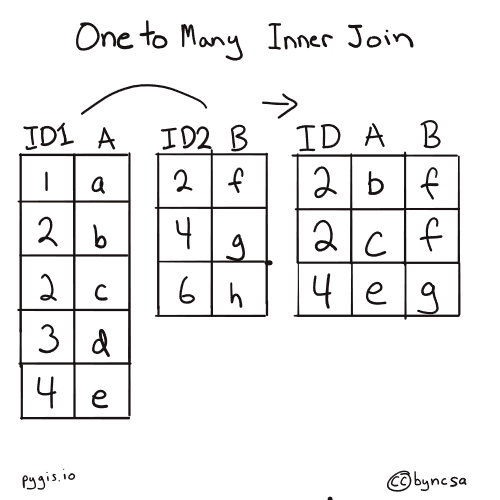

#### Many-to-many relationship


One or more features in one geometry are linked to one or more features in the second geometry. The output geometry may have multiple rows of each target and join feature to accommodate the multiple linkages, which can create ambiguity—hence why a many-to-many join should be avoided. 3



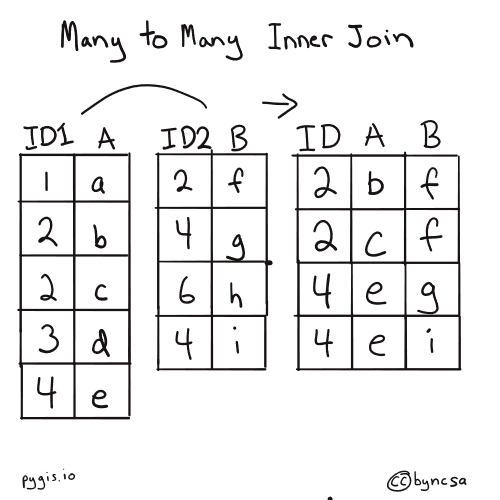

Tip

To ensure you’re doing a one-to-one or one-to-many join, it may be helpful to envision your spatial join before performing a spatial join. Think about what geometries you will be joining to (the target feature) and what geometry or geometries from the join feature might be joined to one geometry in the target feature.

## Point Density Measures - Counts & Kernel Density


Summary operations are useful for aggregating data, whether it be for analyzing overall trends or visualizing concentrations of data. Summarizing allows for effective analysis and communication of the data as compared to simply looking at or displaying points, lines, and polygons on a map.

This chapter will explore two summary operations that highlight concentrations of data: count points in a rectangular or hexagonal grid or by polygon and kernel density.

In [ ]:
!pip install geopandas
!pip install geoplot
!pip install rasterio

In [ ]:
# Import modules
import geopandas as gpd
import geoplot as gplt
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import Affine
from scipy import stats
from shapely.geometry import Polygon, box
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

We will utilize shapefiles of San Francisco Bay Area county boundaries and wells within the Bay Area and the surrounding 50 km. We will load in the data and reproject the data

### Count Points in Rectangular or Hexagonal Grid or by Polygon


To summarize by grid, we create a new polygon layer consisting of a grid and overlay on another feature. We can summarize an aspect of that feature within each cell of the grid. The polygon layer commonly consists of a fishnet (rectangular cells), but using hexagons as a grid is becoming increasingly widespread.



Let’s define a function that will create a grid of either rectangles or hexagons of a specified side length.



In [ ]:
def create_grid(feature, shape, side_length):
    '''Create a grid consisting of either rectangles or hexagons with a specified side length that covers the extent of input feature.'''

    # Slightly displace the minimum and maximum values of the feature extent by creating a buffer
    # This decreases likelihood that a feature will fall directly on a cell boundary (in between two cells)
    # Buffer is projection dependent (due to units)
    feature = feature.buffer(20)

    # Get extent of buffered input feature
    min_x, min_y, max_x, max_y = feature.total_bounds


    # Create empty list to hold individual cells that will make up the grid
    cells_list = []

    # Create grid of squares if specified
    if shape in ["square", "rectangle", "box"]:

        # Adapted from https://james-brennan.github.io/posts/fast_gridding_geopandas/
        # Create and iterate through list of x values that will define column positions with specified side length
        for x in np.arange(min_x - side_length, max_x + side_length, side_length):

            # Create and iterate through list of y values that will define row positions with specified side length
            for y in np.arange(min_y - side_length, max_y + side_length, side_length):

                # Create a box with specified side length and append to list
                cells_list.append(box(x, y, x + side_length, y + side_length))


    # Otherwise, create grid of hexagons
    elif shape == "hexagon":

        # Set horizontal displacement that will define column positions with specified side length (based on normal hexagon)
        x_step = 1.5 * side_length

        # Set vertical displacement that will define row positions with specified side length (based on normal hexagon)
        # This is the distance between the centers of two hexagons stacked on top of each other (vertically)
        y_step = math.sqrt(3) * side_length

        # Get apothem (distance between center and midpoint of a side, based on normal hexagon)
        apothem = (math.sqrt(3) * side_length / 2)

        # Set column number
        column_number = 0

        # Create and iterate through list of x values that will define column positions with vertical displacement
        for x in np.arange(min_x, max_x + x_step, x_step):

            # Create and iterate through list of y values that will define column positions with horizontal displacement
            for y in np.arange(min_y, max_y + y_step, y_step):

                # Create hexagon with specified side length
                hexagon = [[x + math.cos(math.radians(angle)) * side_length, y + math.sin(math.radians(angle)) * side_length] for angle in range(0, 360, 60)]

                # Append hexagon to list
                cells_list.append(Polygon(hexagon))

            # Check if column number is even
            if column_number % 2 == 0:

                # If even, expand minimum and maximum y values by apothem value to vertically displace next row
                # Expand values so as to not miss any features near the feature extent
                min_y -= apothem
                max_y += apothem

            # Else, odd
            else:

                # Revert minimum and maximum y values back to original
                min_y += apothem
                max_y -= apothem

            # Increase column number by 1
            column_number += 1

    # Else, raise error
    else:
        raise Exception("Specify a rectangle or hexagon as the grid shape.")

    # Create grid from list of cells
    grid = gpd.GeoDataFrame(cells_list, columns = ['geometry'], crs = proj)

    # Create a column that assigns each grid a number
    grid["Grid_ID"] = np.arange(len(grid))

    # Return grid
    return grid

We will illustrate this methodology by counting the number of well points within each cell of the grid. There are two different ways we can accomplish this methodology, both with advantages and disadvantages.

To begin, we will set some global parameters for both examples.



In [ ]:
# Set side length for cells in grid
# This is dependent on projection chosen as length is in units specified in projection
side_length = 5000

# Set shape of grid
shape = "hexagon"
# shape = "rectangle"

#### Method 1 - Group by

This method involves using spatial joins to allocate each point to the cell in which it resides. All the points within each cell are subsequently grouped together and counted.



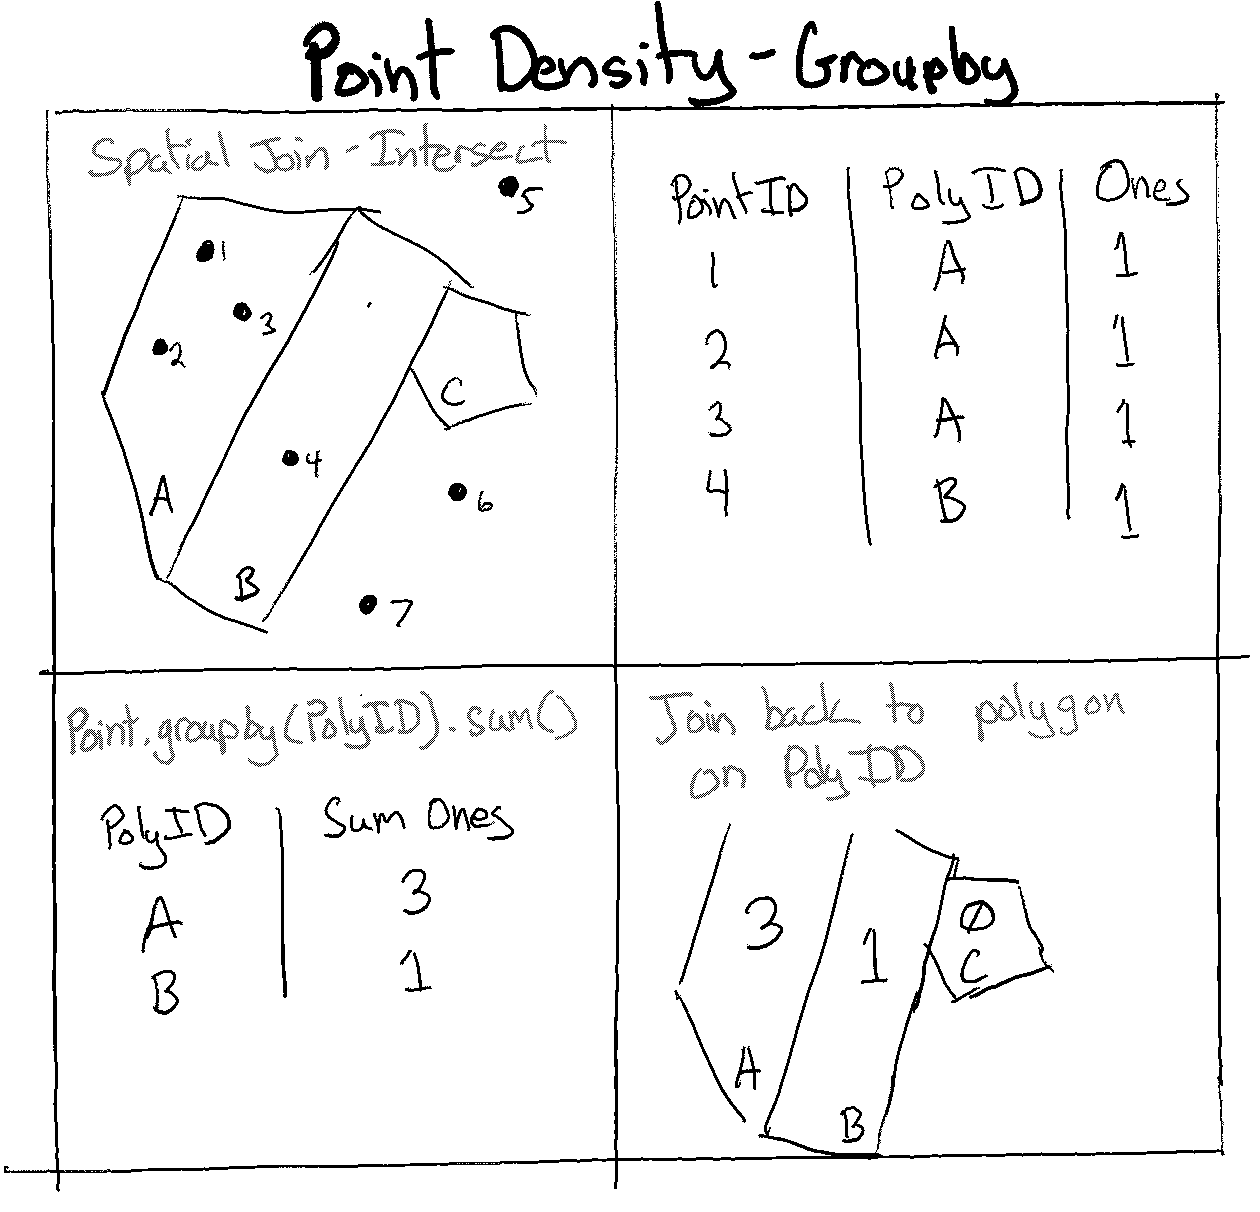

First, we will create a grid over the Bay Area.



In [ ]:
# Create grid
bay_area_grid = create_grid(feature = wells, shape = shape, side_length = side_length)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
bay_area_grid.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', alpha = 0.55)

# Set title
ax.set_title('San Francisco Bay Area - Boundaries, Wells, and Grids', fontdict = {'fontsize': '15', 'fontweight' : '3'})

Next, we will conduct a spatial join for each well point, essentially assigning it to a cell. We can add a field with a value of 1, group all the wells in a cell, and aggregate (sum) all those 1 values to get the total number of wells in a cell.



In [ ]:
# Perform spatial join, merging attribute table of wells point and that of the cell with which it intersects
# op = "intersects" also counts those that fall on a cell boundary (between two cells)
# op = "within" will not count those fall on a cell boundary
wells_cell = gpd.sjoin(wells, bay_area_grid, how = "inner", op = "intersects")

# Remove duplicate counts
# With intersect, those that fall on a boundary will be allocated to all cells that share that boundary
wells_cell = wells_cell.drop_duplicates(subset = ['Well_ID']).reset_index(drop = True)

# Set field name to hold count value
count_field = "Count"

# Add a field with constant value of 1
wells_cell[count_field] = 1

# Group GeoDataFrame by cell while aggregating the Count values
wells_cell = wells_cell.groupby('Grid_ID').agg({count_field:'sum'})

# Merge the resulting grouped dataframe with the grid GeoDataFrame, using a left join to keep all cell polygons
bay_area_grid = bay_area_grid.merge(wells_cell, on = 'Grid_ID', how = "left")

# Fill the NaN values (cells without any points) with 0
bay_area_grid[count_field] = bay_area_grid[count_field].fillna(0)

# Convert Count field to integer
bay_area_grid[count_field] = bay_area_grid[count_field].astype(int)

# Display grid attribute table
display(bay_area_grid)

We can plot the data to see how it looks.



In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
bay_area_grid.plot(ax = ax, column = "Count", cmap = "RdPu", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.70, legend = True)

# Set title
ax.set_title('San Francisco Bay Area - Binning Well Points', fontdict = {'fontsize': '15', 'fontweight' : '3'})

The advantage of this method is that it is pretty fast. To verify that all points have been counted once, we can check the aggregate of all the point sums for each cell.



In [ ]:
# Check total number of well points counted and compare to number of well points in input data
print("Total number of well points counted: {}\nNumber of well points in input data: {}".format(sum(bay_area_grid.Count), len(wells)))

#### Method 2 - Iterate through each feature

This second method is slightly more intuitive, but it can take a long time to run. We will use a subset of the input data–those that fall within Santa Clara County–to illustrate this example. We will first subset our data to Santa Clara County (click the + below to show code cell).



In [ ]:
# Select the Santa Clara County boundary
sc_county = counties[counties["coname"] == "Santa Clara County"]

# Subset the GeoDataFrame by checking which wells are within Santa Clara County
sc_county_wells = wells[wells.within(sc_county.geometry.values[0])]

Next, we will create a grid over Santa Clara County.



In [ ]:
# Create grid
sc_county_grid = create_grid(feature = sc_county_wells, shape = shape, side_length = side_length)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
sc_county.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
sc_county_wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
sc_county_grid.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', alpha = 0.55)

# Set title
ax.set_title('Santa Clara County - Boundaries, Wells, and Grids', fontdict = {'fontsize': '15', 'fontweight' : '3'})

We iterate through each cell in the grid and set a counter for each cell. We iterate through each well point and see if it is within (or intersects) the cell. If it is, the counter is increased by 1, and the feature is “discarded” so that it won’t be counted again (resolving the issue of a point falling on the boundary between two cells).



In [ ]:
# Create empty list used to hold count values for each grid
counts_list = []

# Create empty list to hold index of points that have already been matched to a grid
counted_points = []

# Iterate through each cell in grid
for i_1 in range(0, sc_county_grid.shape[0]):

    # Get a cell by index
    cell = sc_county_grid.iloc[[i_1]]

    # Reset index of cell to 0
    cell = cell.reset_index(drop = True)

    # Set point count to 0
    count = 0

    # Iterate through each feature in wells dataset
    for i_2 in range(0, sc_county_wells.shape[0]):

        # Check if index of point is in list of indices whose points have already been matched to a grid and counted
        if i_2 in counted_points:

            # If already counted, skip remaining statements in loop and start at top of loop
            continue

        # Otherwise, continue with remaining statements
        else:
            pass

        # Get a well point by index
        well = sc_county_wells.iloc[[i_2]]

        # Reset index of well point (to 0) to match the index-reset cell
        well = well.reset_index(drop = True)

        # Check if well intersects the cell
        # Best to use intersects instead of within or contains, as intersect will count points that fall exactly on the cell boundaries
        # Points that fall exactly on a cell boundary (between two cells) will be allocated to the first of the two cells called in script
        criteria_met = well.intersects(cell)[0]

        # If preferred, can check if well is within cell or if cell contains well
        # Both statements do the same thing
        # criteria_met = well.within(cell)[0]
        # criteria_met = cell.contains(well)[0]

        # Check if criteria has been met (True)
        if criteria_met:

            # If True, increase counter by 1 for the cell
            count += 1

            # Add index of counted point to the list
            counted_points.append(i_2)

        # Otherwise, criteria is not met (False)
        else:
            pass

    # Add total count for that cell to the list of counts
    counts_list.append(count)

# print(counts_list)

# Add a new column to the grid GeoDataFrame with the list of counts for each cell
sc_county_grid['Count'] = pd.Series(counts_list)

# Display grid attribute table
display(sc_county_grid)

We can check to make sure all well points in Santa Clara County were counted.



In [ ]:
# Check total number of well points counted and compare to number of well points in input data
print("Total number of well points counted: {}\nNumber of well points in input data: {}".format(sum(counts_list), len(sc_county_wells)))

Total number of well points counted: 136
Number of well points in input data: 136


Finally, we can plot the data.



In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
sc_county.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
sc_county_wells.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
sc_county_grid.plot(ax = ax, column = "Count", cmap = "RdPu", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.70, legend = True)

# Set title
ax.set_title('Santa Clara County - Binning Well Points', fontdict = {'fontsize': '15', 'fontweight' : '3'})

### Kernel Density Estimation


Kernel density estimation (KDE) visualizes concentrations points or polylines. It calculates a magnitude per unit area, providing the density estimate of features within a specified neighborhood surrounding each feature.

A kernel function is used to fit a smooth surface to each feature. One of the most common types of kernels is the Gaussian kernel, which is a normal density function. 

Other types of kernel functions can be used, and the type affects the influence of surrounding points on a location’s density estimate as the points’ distances increase from that location. These kernels’ functions vary in shapes and characteristics, such as where the function peaks, how pointed the peak is, and how fast the peak is reached with distance. 

In addition to specifying a kernel, the bandwith can also be specified. This parameter defines how spread out the kernel is. A lower bandwith allows points far away from a location to affect the density estimate at that location, whereas with a higher bandwith, only close points have influence. 

Individual density functions based on a specified kernel are plotted for each feature. Then, individual density function values at a location are aggregated to produce the KDE value at that location, and this is repeated across the entire point or polyline extent. The final KDE result is a raster depicting the sum of all individual density functions. 

We will demonstrate two ways to perform kernel density estimation. The first way allows us to quickly visualize the KDE. The second way also allows us to export and save a KDE raster for additional analysis.

Tip

We are intentionally keeping the well points beyond (but within 50 km) of the Bay Area boundaries. This provides a buffer to ensure that the KDE for wells data near the boundaries is not inadvertently influenced by these artificial county boundaries. Once KDE is run, the result can be clipped to the Bay Area boundaries (which we do in the first method).

#### Method 1 - Display

This method uses geoplot, a high-level plotting library for spatial data that complements matplotlib.

In [ ]:
# Set projection to WGS 84 and reproject data
proj_wgs = 4326
counties_wgs = counties.to_crs(proj_wgs)
wells_wgs = wells.to_crs(proj_wgs)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
wells_wgs.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
gplt.kdeplot(wells_wgs,ax=ax,shade = True,cmap = "RdPu",alpha = 0.5) 

# Set title
ax.set_title('San Francisco Bay Area - Kernel Density Estimation for Wells', fontdict = {'fontsize': '15', 'fontweight' : '3'})

Method 2 - Display and export with scikit-learn

In [ ]:
# Get X and Y coordinates of well points
x_sk = wells_wgs["geometry"].x
y_sk = wells_wgs["geometry"].y

# Get minimum and maximum coordinate values of well points
min_x_sk, min_y_sk, max_x_sk, max_y_sk = wells_wgs.total_bounds

# Create a cell mesh grid
# Horizontal and vertical cell counts should be the same
XX_sk, YY_sk = np.mgrid[min_x_sk:max_x_sk:100j, min_y_sk:max_y_sk:100j]

# Create 2-D array of the coordinates (paired) of each cell in the mesh grid
positions_sk = np.vstack([XX_sk.ravel(), YY_sk.ravel()]).T

# Create 2-D array of the coordinate values of the well points
Xtrain_sk = np.vstack([x_sk, y_sk]).T

# Get kernel density estimator (can change parameters as desired)
kde_sk = KernelDensity(bandwidth = 0.04, metric = 'euclidean', kernel = 'gaussian', algorithm = 'auto')

# Fit kernel density estimator to wells coordinates
kde_sk.fit(Xtrain_sk)

# Evaluate the estimator on coordinate pairs
Z_sk = np.exp(kde_sk.score_samples(positions_sk))

# Reshape the data to fit mesh grid
Z_sk = Z_sk.reshape(XX_sk.shape)

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(np.rot90(Z_sk), cmap = "RdPu", extent = [min_x_sk, max_x_sk, min_y_sk, max_y_sk])
ax.plot(x_sk, y_sk, 'k.', markersize = 2, alpha = 0.1)
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
ax.set_title('San Francisco Bay Area - SciKit-Learn Kernel Density Estimation for Wells', fontdict = {'fontsize': '15', 'fontweight' : '3'})
plt.show()

In [ ]:
def export_kde_raster(Z, XX, YY, min_x, max_x, min_y, max_y, proj, filename):
    '''Export and save a kernel density raster.'''

    # Flip array vertically and rotate 270 degrees
    Z_export = np.rot90(np.flip(Z, 0), 3)

    # Get resolution
    xres = (max_x - min_x) / len(XX)
    yres = (max_y - min_y) / len(YY)

    # Set transform
    transform = Affine.translation(min_x - xres / 2, min_y - yres / 2) * Affine.scale(xres, yres)

    # Export array as raster
    with rasterio.open(
            filename,
            mode = "w",
            driver = "GTiff",
            height = Z_export.shape[0],
            width = Z_export.shape[1],
            count = 1,
            dtype = Z_export.dtype,
            crs = proj,
            transform = transform,
    ) as new_dataset:
            new_dataset.write(Z_export, 1)

In [ ]:
# Export raster
export_kde_raster(Z = Z_sk, XX = XX_sk, YY = YY_sk,
                  min_x = min_x_sk, max_x = max_x_sk, min_y = min_y_sk, max_y = max_y_sk,
                  proj = proj_wgs, filename = "bay-area-wells_kde_sklearn.tif")

## Spatial Interpolation

Interpolation is the process of using locations with known, sampled values (of a phenomenon) to estimate the values at unknown, unsampled areas. 

In this chapter, we will explore three interpolation methods: 
* Thiessen polygons (Voronoi diagrams), 
* k-nearest neighbors (KNN), 
* and kriging.

In [ ]:
!pip install pykrige

In [ ]:
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykrige.ok import OrdinaryKriging
import rasterio
import rasterio.mask
from rasterio.plot import show
from rasterio.transform import Affine
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import box
from shapely.geometry import Polygon, Point
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

We will utilize shapefiles of San Francisco Bay Area county boundaries and rainfall “values” that were “sampled” in the Bay Area. We will load in the data and reproject the data (click the + below to show code cell).



Note

It is critical to use a ‘projected’ coordinate system when doing interpolation. If you keep your data in geographic lat lon distances will vary significantly as you move up and down in latitude… since interpolation depends on distance as a way of establishing relationships this would be a problem… a big one.

In [ ]:
# Rainfall measurement "locations"
# Source: https://earthworks.stanford.edu/catalog/stanford-td754wr4701
# Modified by author by clipping raster to San Francisco Bay Area, generating random points, and extracting raster values (0-255) to the points
rainfall = gpd.read_file("sf_bay_rainfall/sf_bay_rainfall.shp")

# Reproject data to CA Teale Albert
# https://nrm.dfg.ca.gov/FileHandler.ashx?DocumentID=109326&inline
proj = "+proj=aea +lat_1=34 +lat_2=40.5 +lat_0=0 +lon_0=-120 +x_0=0 +y_0=-4000000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs "
counties = counties.to_crs(proj)
rainfall = rainfall.to_crs(proj)

In [ ]:
# Get X and Y coordinates of rainfall points
x_rain = rainfall["geometry"].x
y_rain = rainfall["geometry"].y

# Create list of XY coordinate pairs
coords_rain = [list(xy) for xy in zip(x_rain, y_rain)]

# Get extent of counties feature
min_x_counties, min_y_counties, max_x_counties, max_y_counties = counties.total_bounds

# Get list of rainfall "values"
value_rain = list(rainfall["VALUE"])

# Create a copy of counties dataset
counties_dissolved = counties.copy()

# Add a field with constant value of 1
counties_dissolved["constant"] = 1

# Dissolve all counties to create one polygon
counties_dissolved = counties_dissolved.dissolve(by = "constant").reset_index(drop = True)

In [ ]:
def export_kde_raster(Z, XX, YY, min_x, max_x, min_y, max_y, proj, filename):
    '''Export and save a kernel density raster.'''

    # Get resolution
    xres = (max_x - min_x) / len(XX)
    yres = (max_y - min_y) / len(YY)

    # Set transform
    transform = Affine.translation(min_x - xres / 2, min_y - yres / 2) * Affine.scale(xres, yres)

    # Export array as raster
    with rasterio.open(
            filename,
            mode = "w",
            driver = "GTiff",
            height = Z.shape[0],
            width = Z.shape[1],
            count = 1,
            dtype = Z.dtype,
            crs = proj,
            transform = transform,
    ) as new_dataset:
            new_dataset.write(Z, 1)

With any model used for prediction, it is important to assess the model fit for unobserved locations (or the accuracy of the values predicted by the model in relation to their actual values). Thus, in order to assess the fit, we break our data into two portions, a “training” data set used to train the model, and a “testing” set that remains “unseen” by the model but can be used to assess model performance. Effectively, we can use this “unseen” testing subset to validate the model because we can compare their true values with the estimated value from the model prediction.

We will separate our rainfall dataset into two subsets: one for training and the other for testing. These subsets will be used in our KNN and kriging analyses.

In [ ]:
# Split data into testing and training sets
coords_rain_train, coords_rain_test, value_rain_train, value_rain_test = train_test_split(coords_rain, value_rain, test_size = 0.20, random_state = 42)

# Create separate GeoDataFrames for testing and training sets
rain_train_gdf = gpd.GeoDataFrame(geometry = [Point(x, y) for x, y in coords_rain_train], crs = proj)
rain_train_gdf["Actual_Value"] = value_rain_train
rain_test_gdf = gpd.GeoDataFrame(geometry = [Point(x, y) for x, y in coords_rain_test], crs = proj)
rain_test_gdf["Actual_Value"] = value_rain_test

# Get minimum and maximum coordinate values of rainfall training points
min_x_rain, min_y_rain, max_x_rain, max_y_rain = rain_train_gdf.total_bounds

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
plt.style.use('bmh')

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
rain_train_gdf.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 3)
rain_test_gdf.plot(ax = ax, marker = 'o', color = 'royalblue', markersize = 3)
# Set title
ax.set_title('San Francisco Bay Area - Rainfall Measurement Locations', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In the map above, the green and blue points are the rainfall points that we loaded separated into the training set and testing set, respectively.



### Thiessen Polygons (Voronoi Diagrams)


Thiessen polygons (also known as Voronoi diagrams) polygons allow us to perform nearest neighbor interpolation, which is perhaps the most basic type of interpolation. 

Thiessen polygons are be constructed around each sampled point so all the space within a specific polygon is closest in distance to that sampled point (as compared to other sampled points). 

Then, to perform nearest neighbor interpolation, all that space is assigned the value of that sampled point.

We can use the scipy package to create Thiessen polygons. After running the Voronoi() function, we can use the vertices attribute to get a list of vertices, which we can subsequently use to generate polygons.

⚠ Attention

When creating Thiessen polygons, the sample points toward the edges of the point shapefile’s extent will have infinite Voronoi regions, because not all sides of these edge points have adjacent sample points that would constrain the regions. Consequently, these infinite regions will not be exported. To mitigate this issue, we can create dummy points well beyond the extent of our datasets, which will create finite Voronoi regions for all of our actual sample points. Then, we can clip the regions to our extent shapefile (creating dummy points far away from our actual sample points will ensure the dummy points and their infinite Voronoi regions do not interfere with the sample points and their associated finite Voronoi regions after all regions are clipped).

In [ ]:
# Extend extent of counties feature by using buffer
counties_buffer = counties.buffer(100000)

# Get extent of buffered input feature
min_x_cty_tp, min_y_cty_tp, max_x_cty_tp, max_y_cty_tp = counties_buffer.total_bounds

# Use extent to create dummy points and add them to list of coordinates
coords_tp = coords_rain_train + [[min_x_cty_tp, min_y_cty_tp], [max_x_cty_tp, min_y_cty_tp],
                                 [max_x_cty_tp, max_y_cty_tp], [min_x_cty_tp, max_y_cty_tp]]

# Compute Voronoi diagram
tp = Voronoi(coords_tp)

# Create empty list of hold Voronoi polygons
tp_poly_list = []

# Create a polygon for each region
# 'regions' attribute provides a list of indices of the vertices (in the 'vertices' attribute) that make up the region
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html
for region in tp.regions:

    # Ignore region if -1 is in the list (based on documentation)
    if -1 in region:

        # Return to top of loop
        continue

    # Otherwise, pass
    else:
        pass

    # Check that region list has values in it
    if len(region) != 0:

        # Create a polygon by using the region list to call the correct elements in the 'vertices' attribute
        tp_poly_region = Polygon(list(tp.vertices[region]))

        # Append polygon to list
        tp_poly_list.append(tp_poly_region)

    # If no values, return to top of loop
    else:
        continue

# Create GeoDataFrame from list of polygon regions
tp_polys = gpd.GeoDataFrame(tp_poly_list, columns = ['geometry'], crs = proj)

# Clip polygon regions to the counties boundary
tp_polys_clipped = gpd.clip(tp_polys, counties_dissolved)

In [ ]:
# If rainfall point within the polygon, assign that rainfall value to the polygon
tp_polys_clipped_values = gpd.sjoin(rain_train_gdf, tp_polys_clipped, how = "right", op = 'within')

# Drop un-needed column
tp_polys_clipped_values = tp_polys_clipped_values.drop("index_left", axis = 1)

# Rename column
tp_polys_clipped_values = tp_polys_clipped_values.rename(columns = {"Actual_Value": "VALUE_Thiessen"})

# Display head of attribute table
print("Attribute Table: Thiessen Polygon Interpolated Values")
display(tp_polys_clipped_values.head())

A second spatial join can be conducted to assign those values from the Thiessen polygons to the points from the testing dataset (only if a test point falls within a polygon). We can subsequently get the out-of-sample r-squared value, which is calculated by using the data points that the model did not use (the testing dataset) and comparing the testing dataset’s actual values to the values as predicted by the model.



In [ ]:
# If test point is within a polygon, assign that polygon's value to the test point
rain_test_pred_tp = gpd.sjoin(rain_test_gdf, tp_polys_clipped_values, how = "left", op = 'within')

# Drop un-needed column
rain_test_pred_tp = rain_test_pred_tp.drop("index_right", axis = 1)

# Rename column
rain_test_pred_tp = rain_test_pred_tp.rename(columns = {"Actual_Value": "VALUE_Actual", "VALUE_Thiessen": "VALUE_Predict"})

# Generate out-of-sample R^2
out_r_squared_tp = r2_score(rain_test_pred_tp.VALUE_Actual, rain_test_pred_tp.VALUE_Predict)
print("Thiessen polygon out-of-sample r-squared: {}".format(round(out_r_squared_tp, 2)))

# Display attribute table
print("\nAttribute Table: Testing Dataset Interpolated Values - Thiessen Polygon Method")
display(rain_test_pred_tp.head(2))

Plotting the data, we see that each polygon has one green training point (and vice-versa). All space within one polygon is closest to the known training point (green dot) within the polygon. The testing points (blue dots) are assigned the value of the Thiessen polygon in which it falls.



In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 20))

# Stylize plots
plt.style.use('bmh')

# Plot data
counties_dissolved.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
tp_polys_clipped.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
rain_train_gdf.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 15)
rain_test_pred_tp.plot(ax = ax, marker = 'o', color = 'royalblue', markersize = 15)

# Iterate through each rainfall train point to add a label with its value to the plot
for index, row in rain_train_gdf.iterrows():
    plt.annotate(row.Actual_Value, (row.geometry.x, row.geometry.y))

# Iterate through each rainfall test point to add a label with its value to the plot
for index, row in rain_test_pred_tp.iterrows():
    plt.annotate(row.VALUE_Predict, (row.geometry.x, row.geometry.y))

# Set title
ax.set_title('San Francisco Bay Area - Rainfall Measurement Locations & Thiessen Polygons', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [ ]:
# Set index for feature of interest
feature_index_one = 5

# Get a Voronoi polygon for one feature
# 'point_region' attribute provides the index of the Voronoi region belonging to a specified point
# Can use the index to call the appropriate element in the 'regions' attribute
tp_poly_region_one = Polygon(tp.vertices[tp.regions[tp.point_region[feature_index_one]]])

# Create GeoDataFrame for polygon
tp_poly_region_one = gpd.GeoDataFrame([tp_poly_region_one], columns = ['geometry'], crs = proj)

# Clip polygon to county boundary
tp_poly_region_one = gpd.clip(tp_poly_region_one, counties_dissolved)

# Get the equivalent feature from the rainfall dataset
rain_one = rain_train_gdf.iloc[[feature_index_one]]

# Add the rainfall value to the polygon attribute table
tp_poly_region_one["VALUE_Predict"] = rain_one["Actual_Value"].values

# Display attribute table
print("Attribute Table: Thiessen Polygon Interpolated Value")
display(tp_poly_region_one)

In [ ]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
plt.style.use('bmh')

# Plot data
tp_poly_region_one.plot(ax = ax, color = 'lightseagreen', edgecolor = 'white', linewidth = 0.5)
rain_one.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 100)

# Set title
ax.set_title('San Francisco Bay Area - One Point and Thiessen Polygon', fontdict = {'fontsize': '15', 'fontweight' : '3'})

### K-Nearest Neighbors


KNN (also stylized as kNN) is a neighbor-based learning method that can be used for interpolation. Unlike the Thiessen polygons method, KNN looks for a specified number K of sampled points closest to an unknown point. The K known points can be used to predict the value (discrete or continuous) of the unknown point. 

We can use the scikit-learn module to perform KNN analysis.

In [ ]:
# Set number of neighbors to look for
neighbors = 5

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors = neighbors, weights = "distance")

# Fit regressor to data
knn_regressor.fit(coords_rain_train, value_rain_train)

Now that we have created the KNN model, we can get the in-sample r-squared value. An in-sample statistic, as suggested by its name, is calculated by using the data that were used to build the model (the “training” dataset).



In [ ]:
# Generate in-sample R^2
in_r_squared_knn = knn_regressor.score(coords_rain_train, value_rain_train)
print("KNN in-sample r-squared: {}".format(round(in_r_squared_knn, 2)))

Here, the in-sample r-squared value is 100% because KNN is a “exact interpolator.” For exact interpolators, estimated values for known points are exactly equal to actual values. Other methods like Kriging, shown below, are inexact interpolators. For inexact interpolators, estimated values for known points are not exactly equal to actual values. Here’s a visual of inexact versus exact interpolators.

Similarily, we can also get the out-of-sample r-squared value and compare the test dataset’s actual values to the values as predicted by the model.

In [ ]:
# Generate out-of-sample R^2
out_r_squared_knn = knn_regressor.score(coords_rain_test, value_rain_test)
print("KNN out-of-sample r-squared: {}".format(round(out_r_squared_knn, 2)))

# Predict values for testing dataset
coords_rain_test_predict_knn = knn_regressor.predict(coords_rain_test)

# Create dictionary holding the actual and predicted values
predict_dict_knn = {"Coordinate_Pair": coords_rain_test, "VALUE_Actual": value_rain_test, "VALUE_Predict": coords_rain_test_predict_knn}

# Create dataframe from dictionary
predict_df_knn = pd.DataFrame(predict_dict_knn)

# Display attribute table
print("\nAttribute Table: Testing Set Interpolated Values - KNN Method")
display(predict_df_knn.head(2))

KNN out-of-sample r-squared: 0.93

Attribute Table: Testing Set Interpolated Values - KNN Method


,Coordinate_Pair,VALUE_Actual,VALUE_Predict
0,"[-229633.10884980165, 40063.95711899735]",56,55.827991
1,"[-273849.54863259906, 92453.78988359356]",73,87.640074


Out-of-sample r-squared looks pretty strong!



Tip

If you are just interested in identifying the k nearest neighbors (no interpolation), use the NearestNeighbors() function.

### Kriging

Kriging is a type of interpolation that uses a semivariogram, which measures spatial autocorrelation (how similar close points are in value and how this similarity changes as distance between points increases). 

Thus, the semivariogram determines how much influence a known point has on an unknown point as the distance between the known point and the unknown point increases. 

In other words, the weight of a known point on an unknown point decreases with increasing distance, and the semivariogram determines how quickly that weight tapers with increasing distance.

Two Python packages that can be used for kriging include scikit-learn and pykrige. The former package works best when the input data has a WGS 84 projection, so we will begin by reprojecting all of our data to that coordinate system.



In [ ]:
# Set projection to WGS 84 and reproject data
proj_wgs = 4326
counties_wgs = counties.to_crs(proj_wgs)
rainfall_wgs = rainfall.to_crs(proj_wgs)
rain_train_gdf_wgs = rain_train_gdf.to_crs(proj_wgs)
rain_test_gdf_wgs = rain_test_gdf.to_crs(proj_wgs)

# Get X and Y coordinates of rainfall points
x_rain_wgs = rainfall_wgs["geometry"].x
y_rain_wgs = rainfall_wgs["geometry"].y

# Create list of XY coordinate pairs
coords_rain_train_wgs = [list(xy) for xy in zip(rain_train_gdf_wgs["geometry"].x, rain_train_gdf_wgs["geometry"].y)]
coords_rain_test_wgs = [list(xy) for xy in zip(rain_test_gdf_wgs["geometry"].x, rain_test_gdf_wgs["geometry"].y)]

# Get minimum and maximum coordinate values of rainfall points
min_x_rain_wgs, min_y_rain_wgs, max_x_rain_wgs, max_y_rain_wgs = rain_train_gdf_wgs.total_bounds

#### Method 1 - Using PyKrige

The pykrige module offers ordinary and universal kriging. It also supports various variogram models in addition to Gaussian.



In [ ]:
# Create a 100 by 100 grid
# Horizontal and vertical cell counts should be the same
XX_pk_krig = np.linspace(min_x_rain, max_x_rain, 100)
YY_pk_krig = np.linspace(min_y_rain, max_y_rain, 100)

# Generate ordinary kriging object
OK = OrdinaryKriging(
    np.array(x_rain),
    np.array(y_rain),
    value_rain,
    variogram_model = "linear",
    verbose = False,
    enable_plotting = False,
    coordinates_type = "euclidean",
)

# Evaluate the method on grid
Z_pk_krig, sigma_squared_p_krig = OK.execute("grid", XX_pk_krig, YY_pk_krig)

# Export raster
export_kde_raster(Z = Z_pk_krig, XX = XX_pk_krig, YY = YY_pk_krig,
                  min_x = min_x_rain, max_x = max_x_rain, min_y = min_y_rain, max_y = max_y_rain,
                  proj = proj, filename = "e_bay-area-rain_pk_kriging.tif")

# Open raster
raster_pk = rasterio.open("e_bay-area-rain_pk_kriging.tif")


# Create polygon with extent of raster
poly_shapely = box(*raster_pk.bounds)

# Create a dictionary with needed attributes and required geometry column
attributes_df = {'Attribute': ['name1'], 'geometry': poly_shapely}

# Convert shapely object to a GeoDataFrame
raster_pk_extent = gpd.GeoDataFrame(attributes_df, geometry = 'geometry', crs = proj)

# Create copy of test dataset
rain_test_gdf_pk_krig = rain_test_gdf.copy()

# Subset the GeoDataFrame by checking which test points are within the raster extent polygon
# If a test point is beyond the extent of training points dataset, the kriging output may not cover that test point
rain_test_gdf_pk_krig = rain_test_gdf_pk_krig[rain_test_gdf_pk_krig.within(raster_pk_extent.geometry.values[0])]

# Create list of XY coordinate pairs for the test points that fall within raster extent polygon
coords_rain_test_pk_krig = [list(xy) for xy in zip(rain_test_gdf_pk_krig["geometry"].x, rain_test_gdf_pk_krig["geometry"].y)]

# Extract raster value at each test point and add the values to the GeoDataFrame
rain_test_gdf_pk_krig["VALUE_Predict"] = [x[0] for x in raster_pk.sample(coords_rain_test_pk_krig)]

# Generate out-of-sample R^2
out_r_squared_tp = r2_score(rain_test_gdf_pk_krig.Actual_Value, rain_test_gdf_pk_krig.VALUE_Predict)
print("PyKrige Kriging out-of-sample r-squared: {}".format(round(out_r_squared_tp, 2)))

# Display attribute table
print("\nAttribute Table: Random Points Interpolated Values - PyKrige Kriging Method")
display(rain_test_gdf_pk_krig.head(2))


# Mask raster to counties shape
out_image_pk, out_transform_pk = rasterio.mask.mask(raster_pk, counties.geometry.values, crop = True)

# Stylize plots
plt.style.use('bmh')

# Plot data
fig, ax = plt.subplots(1, figsize = (10, 10))
show(out_image_pk, ax = ax, transform = out_transform_pk, cmap = "RdPu")
ax.plot(x_rain, y_rain, 'k.', markersize = 2, alpha = 0.5)
counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
plt.gca().invert_yaxis()

# Set title
ax.set_title('San Francisco Bay Area - Interpolating Rainfall using Kriging from PyKrige', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()

#### Method 2- Using scikit-learn


Kriging can be performed using Gaussian processes from the scikit-learn module (Gaussian processes is essentially equivalent to kriging). Various kernels for Gaussian processes can be specified. We will continue to use the training and testing datasets created from our KNN analysis.



In [ ]:
# Create a 100 by 100 cell mesh grid
# Horizontal and vertical cell counts should be the same
XX_sk_krig, YY_sk_krig = np.mgrid[min_x_rain_wgs:max_x_rain_wgs:100j, min_y_rain_wgs:max_y_rain_wgs:100j]

# Create 2-D array of the coordinates (paired) of each cell in the mesh grid
positions_sk_krig = np.vstack([XX_sk_krig.ravel(), YY_sk_krig.ravel()]).T

# Generate Gaussian Process model (can change parameters as desired)
gp = GaussianProcessRegressor(n_restarts_optimizer = 10)

# Fit kernel density estimator to coordinates and values
gp.fit(coords_rain_train_wgs, value_rain_train)

# Evaluate the model on coordinate pairs
Z_sk_krig = gp.predict(positions_sk_krig)

# Reshape the data to fit mesh grid
Z_sk_krig = Z_sk_krig.reshape(XX_sk_krig.shape)

In [ ]:
# Generate in-sample R^2
in_r_squared_sk_krig = gp.score(coords_rain_train_wgs, value_rain_train)
print("Scikit-Learn Kriging in-sample r-squared: {}".format(round(in_r_squared_sk_krig, 2)))

# Generate out-of-sample R^2
out_r_squared_sk_krig = gp.score(coords_rain_test_wgs, value_rain_test)
print("Scikit-Learn Kriging out-of-sample r-squared: {}".format(round(out_r_squared_sk_krig, 2)))

# Predict values for testing dataset
coords_rain_test_predict_sk_krig = gp.predict(coords_rain_test_wgs)

# Create dictionary holding the actual and predicted values
predict_dict_sk_krig = {"Coordinate_Pair": coords_rain_test_wgs, "VALUE_Actual": value_rain_test, "VALUE_Predict": coords_rain_test_predict_sk_krig}

# Create dataframe from dictionary
predict_df_sk_krig = pd.DataFrame(predict_dict_sk_krig)

# Display attribute table
print("\nAttribute Table: Testing Set Interpolated Values - Scikit-Learn Kriging Method")
display(predict_df_sk_krig.head(2))

In [ ]:
# Flip array vertically and rotate 270 degrees
Z_sk_krig = np.rot90(np.flip(Z_sk_krig, 0), 3)

# Export raster
export_kde_raster(Z = Z_sk_krig, XX = XX_sk_krig, YY = YY_sk_krig,
                  min_x = min_x_rain_wgs, max_x = max_x_rain_wgs, min_y = min_y_rain_wgs, max_y = max_y_rain_wgs,
                  proj = proj_wgs, filename = "e_bay-area-rain_sk_kriging.tif")

Attention

The resulting raster should be clipped. Because the resulting raster covers the extent of the points in a bounding box fashion, the raster in this case covers areas that are not within the counties boundaries (such as in the ocean) where we do not have sample points. Thus, there will be interpolated values in those areas that might not make sense.

Finally, we import the raster, mask it to the counties boundaries, and plot the data.



In [ ]:
# Open raster
raster_sk = rasterio.open("e_bay-area-rain_sk_kriging.tif")

# Mask raster to counties shape
out_image_sk, out_transform_sk = rasterio.mask.mask(raster_sk, counties_wgs.geometry.values, crop = True)

# Stylize plots
plt.style.use('bmh')

# Plot data
fig, ax = plt.subplots(1, figsize = (10, 10))
show(out_image_sk, ax = ax, transform = out_transform_sk, cmap = "RdPu")
ax.plot(x_rain_wgs, y_rain_wgs, 'k.', markersize = 2, alpha = 0.5)
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
plt.gca().invert_yaxis()

# Set title
ax.set_title('San Francisco Bay Area - Interpolating Rainfall using Kriging from Scikit-Learn', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()


# Plot data
fig, ax = plt.subplots(1, figsize = (10, 10))
show(out_image_sk, ax = ax, transform = out_transform_sk, cmap = "RdPu")
ax.plot(x_rain_wgs, y_rain_wgs, 'k.', markersize = 2, alpha = 0.5)
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
plt.gca().invert_yaxis()

# Set title
ax.set_title('San Francisco Bay Area - Interpolating Rainfall using Kriging from Scikit-Learn', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Display plot
plt.show()

# end of lesson10